# Machine Learning Foundation

## Course 3, Part a: Logistic Regression LAB

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [1]:
import os, seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

os.chdir('/Users/salahkaf/Desktop/data') # Changing working directory
from colorsetup import colors, palette # Exists in the current directory
sns.set_palette(palette)

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [2]:
### BEGIN SOLUTION
filepath = 'Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath, sep=',')

The data columns are all floats except for the activity label.

In [3]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [4]:
data.dtypes.tail() # Last column is the target 

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [5]:
data.iloc[:, :-1].min().value_counts() # Removing the last column

-1.0    561
dtype: int64

In [6]:
data.iloc[:, :-1].max().value_counts() # Removing the last column

1.0    561
dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [7]:
data.Activity.value_counts() # differnt types of error metrics are going to work better for different types of dataets. Whether they're balanced or unbalanced.
# In this case, they are almost balanced

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)
### END SOLUTION

6845    1
9790    1
4182    2
8803    0
682     5
Name: Activity, dtype: int64

In [9]:
data.dtypes.value_counts()

float64    561
int64        1
dtype: int64

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [10]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values) # The lower triangle

# Make the unused values NaNs
corr_array = np.array(corr_values) # Changing the df to an array
corr_array[tril_index] = np.nan # Assigning the lower traingle to nan
    
# Recreate Pandas correlation data frame
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns, index= corr_values.index)

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157080 entries, 0 to 157079
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   feature1         157080 non-null  object 
 1   feature2         157080 non-null  object 
 2   correlation      157080 non-null  float64
 3   abs_correlation  157080 non-null  float64
dtypes: float64(2), object(2)
memory usage: 4.8+ MB


A histogram of the absolute value correlations.

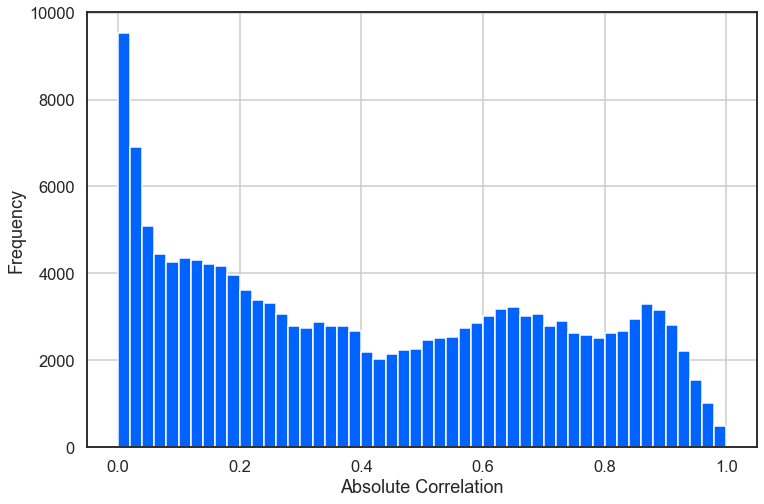

In [11]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [12]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [13]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

# We use 'next' to get the arrays from the generator object.
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))
next(strat_shuf_split.split(data[feature_cols], data.Activity))

(array([1575, 1707, 6425, ..., 3037, 3002,  996]),
 array([7743,  969, 3175, ..., 8914, 8756, 1470]))

In [14]:
# Create the dataframes
X_train = data.loc[train_idx, feature_cols] # loc[index,column]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [15]:
y_train.value_counts(normalize=True) # Normalize gives us the proportial rather than the true count.

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [16]:
y_test.value_counts(normalize=True)
### END SOLUTION

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [17]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# The solver method is one against the rest. So in this case it will run 6 times for each one of the six different classes.

In [18]:
from sklearn.linear_model import LogisticRegressionCV # Cross validation allow us to loop through many different hyperparameters

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
# Cs is the inverse of lambda (it is going to check across against 10 different default values of that c value.)

In [19]:
# L2 regularized logistic regression ~ Generally speaking, L2 tends to run a bit faster
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

## Question 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [20]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_ # The coefficients of the model
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
510 -0.003723 -0.014594  0.053828 -0.067398  0.688315  0.502909  0.000000   
371 -0.039260 -0.427708  0.435059  0.637551  0.281141 -0.637045  0.000000   
98  -0.008272  0.150489  0.159255 -0.077818  0.171983 -0.038043 -0.002586   
405 -0.018716  0.128073  0.099169  0.054850  0.219119 -0.052988  0.000000   
560 -0.188309 -0.298022  0.416920  0.065048 -0.042363  0.438815  0.000000   
396 -0.021049  0.089008  0.044540  0.253658  0.046685 -0.212155  0.000000   
39  -0.482130 -0.017654 -0.081293  0.372836 -1.292554 -0.101507 -0.160362   
339 -0.003917  0.203405  0.164710 -0.085980  0.083657 -0.026651 -0.047390   
71   0.104365 -0.048805 -0.057255  0.658517  0.252381 -1.045461  0.000000   
28   0.098610  0.059819 -0.380409 -0.830660  1.064626 -0.787021  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
510  0.000000  0.000000  0.000000  1.468726  0.854053  0.044508  0.280799   
371 -0.498782  0.532123  1.367181  0.078488 -0.512408 -0.103316 -0.634264   
98   0.000000  0.000000  0.000000  0.102369 -0.052641 -0.033942  0.394266   
405  0.000000  0.000000  0.000000  0.429314 -0.105444 -0.051147  0.197065   
560  0.000000  0.000000  0.000000  0.000000  2.696938 -0.230753  0.788180   
396  0.000000  0.000000  0.173366  0.000000 -0.587073 -0.055317  0.025448   
39   0.140815 -0.362172  0.000000 -4.251940 -0.041063 -0.834765  0.347702   
339  0.000000  0.000000  0.000000  0.000000  0.042024 -0.027977  0.654131   
71   0.000000  0.000000  0.585206  0.000000 -1.975053  0.239641  0.345941   
28   0.000000  0.000000 -2.183416  5.592095 -5.249900  0.136814  0.794329   

                                             
            2         3         4         5  
510  0.219828 -0.271412  1.411074  1.402225  
371  0.401353  1.658105  0.430213 -1.227187  
98   0.194178 -0.247415  0.268304 -0.054924  
405  0.134534  0.091077  0.537261 -0.016794  
560  0.568677  0.129769 -0.083967  1.019578  
396  0.074327  0.428206  0.215034 -0.250945  
39  -0.259237  0.657988 -2.335690  0.136517  
339  0.200096 -0.192676  0.071205 -0.131552  
71  -0.103931  1.463615  0.652206 -1.920459  
28  -0.442644 -2.165990  1.974723 -1.987490

In [21]:
coefficients.shape # 561 row for 3 models (3*6)

(561, 18)

Prepare six separate plots for each of the multi-class coefficients.

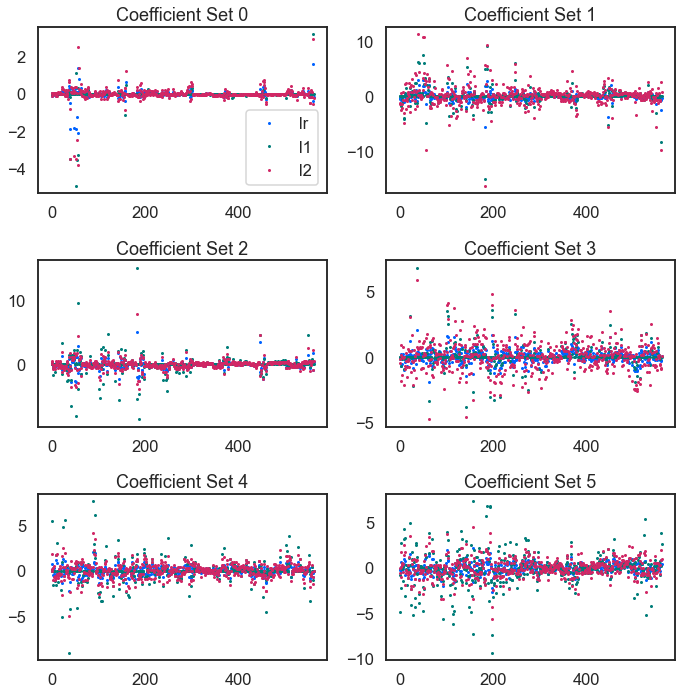

In [22]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

## Question 6

* Predict and store the class for each model.
* Store the probability for the predicted class for each model. 

In [23]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [30]:
y_pred[y_pred['lr'] != y_pred['l1']] # To check for different predicted outcomes

,lr,l1,l2
88,2,1,1
197,2,1,1
296,1,2,1
388,1,2,1
430,4,5,4
489,2,1,1
769,4,3,3
853,5,3,3
1036,1,2,1
1071,1,2,2


In [24]:
y_prob.head()
### END SOLUTION

,lr,l1,l2
0,0.998939,0.998916,0.999757
1,0.988165,0.999763,0.999477
2,0.987592,0.995864,0.999668
3,0.981381,0.999174,0.994339
4,0.998277,0.999923,0.999997


## Question 7

For each model, calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [25]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize # To do one-hot encoding

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [33]:
score(y_test, y_pred['lr'])[0] # Precision for our different lables
# For instance, for those who are predicted as class 1, the model  managed to predict all of them correctly.

array([1.        , 0.9588015 , 0.96322242, 0.99613153, 0.99526066,
       0.99568035])

In [34]:
score(y_test, y_pred['lr'])[1] # recall 

array([1.        , 0.95970009, 0.9623797 , 0.99613153, 0.99526066,
       0.99568035])

In [ ]:
score(y_test, y_pred['lr'])[2] # F score

In [35]:
score(y_test, y_pred['lr'])[3] # Support

array([583, 533, 572, 517, 422, 463])

In [37]:
score(y_test,y_pred['lr'], average='weighted')
# Precision, Recall, F, Support

(0.9841438255400277, 0.9841423948220065, 0.984142828415666, None)

In [26]:
metrics
### END SOLUTION

,lr,l1,l2
precision,0.984144,0.983835,0.983824
recall,0.984142,0.983819,0.983819
fscore,0.984143,0.983815,0.983819
accuracy,0.984142,0.983819,0.983819
auc,0.990384,0.990144,0.990165


## Question 8

Display or plot the confusion matrix for each model.

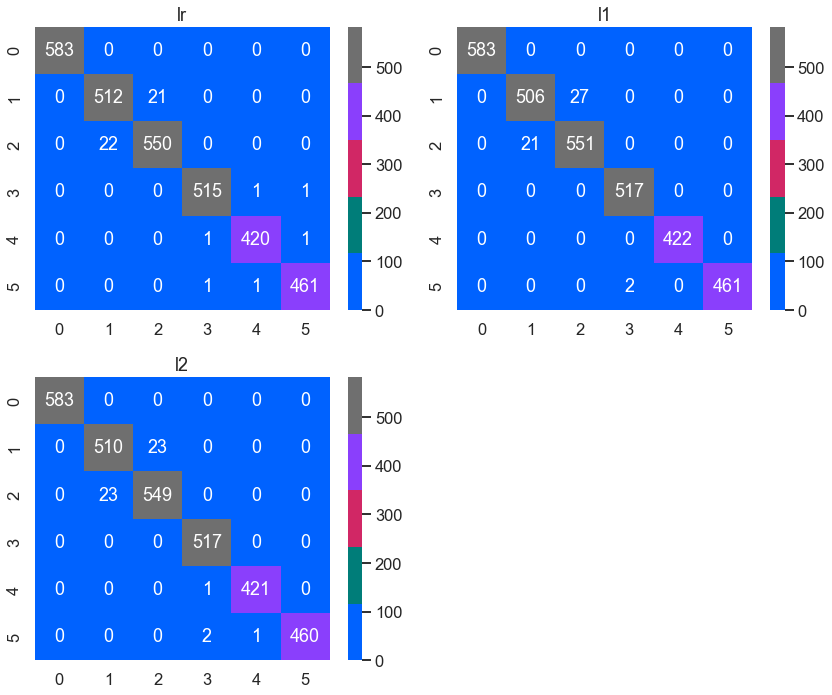

In [39]:
%time
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION

---
### Machine Learning Foundation (C) 2020 IBM Corporation